<a href="https://colab.research.google.com/github/toejo/cryptoClustering/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries and dependencies
import pandas as pd
# import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Axes: xlabel='coin_id'>

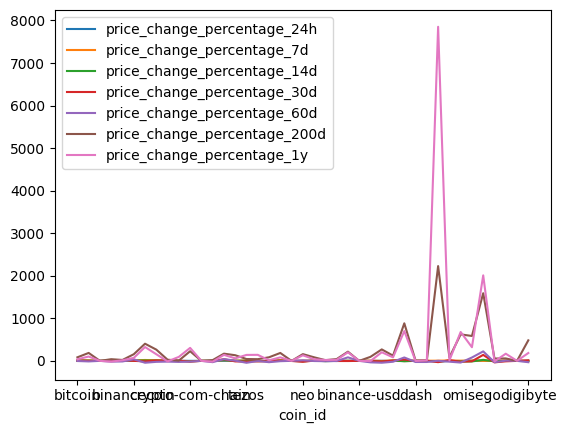

In [ ]:
# Plot your data to see what's in your DataFrame
df_market_data.plot.line(
    # width=800,
    # height=400,
    # rot=90
)

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data)

# df_market_data_scaled

In [ ]:
# Create a DataFrame with the scaled data

# df_market_data.columns

# Copy the crypto names from the original data

df_market_scaled = pd.DataFrame(df_market_data_scaled, columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Set the coinid column as index

df_market_scaled['coin_id'] = df_market_data.index
df_market_scaled = df_market_scaled.set_index('coin_id')

# Display sample data
df_market_scaled.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
huobi-token,-0.052032,-0.457229,0.032522,-0.184489,-0.070809,-0.451982,-0.262140
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [ ]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
  k_model = KMeans(n_clusters = i, random_state = 1)
  k_model.fit(df_market_scaled)
  inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k" : k, "inertia" : inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

<Axes: xlabel='k'>

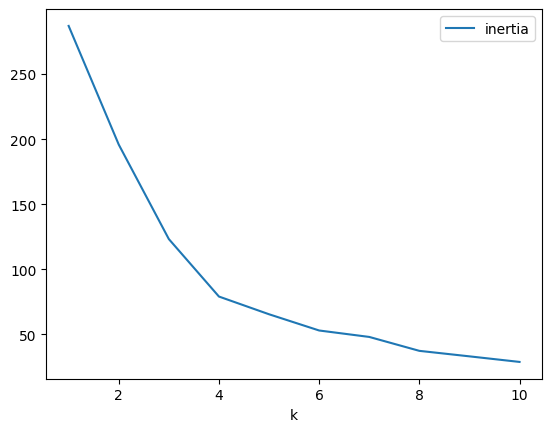

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

elbow_df.plot("k", "inertia")

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** Although there seems to be three contenders (at x = 3, 4, and 6) for the "elbow", the most drastic curve is at x = 4. Therefore, the best value of k is 4.   

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [ ]:
# Initialize the K-Means model using the best value for k
k4 = KMeans(n_clusters = 4)

In [ ]:
# Fit the K-Means model using the scaled data
k4.fit(df_market_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k4_pred = k4.predict(df_market_scaled)

# Print the resulting array of cluster values.
k4_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
# Create a copy of the DataFrame
df_market_scaled_copy = df_market_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_copy['k4_seg'] = k4_pred

# Display sample data
df_market_scaled_copy.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k4_seg
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310,0
cosmos,-0.255978,1.840274,0.643565,0.116538,-0.151913,-0.117565,-0.215191,1
leo-token,0.051758,-0.928381,-0.871918,0.058782,-0.159250,-0.512071,-0.265036,0
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310,0
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,1
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,0


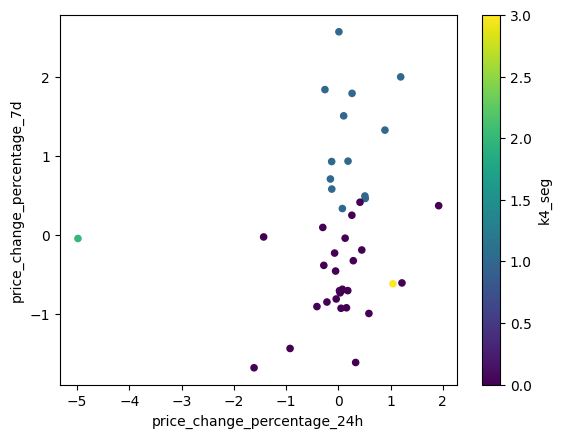

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_market_scaled_copy.plot.scatter('price_change_percentage_24h', 'price_change_percentage_7d',
                                   c='k4_seg', colormap = 'viridis')

plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_df_market_scaled_copy = pca.fit_transform(df_market_scaled_copy)

# View the first five rows of the DataFrame.
pca_df_market_scaled_copy[0:5]

array([[ 1.02716415e-01, -1.09294014e+00,  5.35184395e-01],
       [ 7.67117769e-02, -7.04779064e-01,  1.03685543e+00],
       [-6.19998579e-01, -1.97690890e-02, -6.54034410e-01],
       [-6.64724714e-01,  2.17397355e-03, -4.85221049e-01],
       [ 2.88738674e-01, -2.43700872e+00,  1.79915657e+00]])

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.38043081, 0.33516548, 0.17629339])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explaind variance of the three principal components is 88%.

In [ ]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_df_market_scaled = pd.DataFrame(pca_df_market_scaled_copy, columns = ['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df_market_scaled['coin_id'] = df_market_scaled.index

# Set the coinid column as index
pca_df_market_scaled = pca_df_market_scaled.set_index('coin_id')

# Display sample data
pca_df_market_scaled.sample(10)

,PC1,PC2,PC3
coin_id,,,
zcash,0.127233,-0.719985,1.130855
tron,-0.518500,-0.066216,-0.062626
ethereum-classic,-0.790018,0.051012,-0.107393
bitcoin-cash,0.288739,-2.437009,1.799157
dash,-0.845625,0.127322,0.344230
binance-usd,-0.626570,-0.043043,-0.659509
digibyte,-0.528432,0.073136,-0.907995
leo-token,-0.863602,0.432299,-1.012276
huobi-token,-0.599808,0.023783,-0.372749


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1,11))

In [ ]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
  k_pca_model = KMeans(n_clusters = i, random_state = 1)
  k_pca_model.fit(pca_df_market_scaled)
  inertia_pca.append(k_pca_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k" : k_pca, 'inertia' : inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_pca = pd.DataFrame(elbow_data_pca)

<Axes: xlabel='k'>

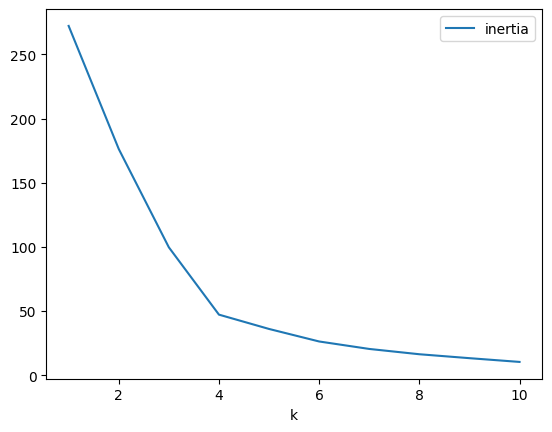

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_data_pca.plot('k', 'inertia', label =)

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best value of k when using the PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Slightly. It is easier to tell which point is the elbow compared to the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
kpca_model = KMeans(n_clusters = 4)

In [ ]:
# Fit the K-Means model using the PCA data
kpca_model.fit(pca_df_market_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kpca_preds = kpca_model.predict(pca_df_market_scaled)
# Print the resulting array of cluster values.
kpca_preds

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_df_market_scaled_copy = pca_df_market_scaled.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_market_scaled_copy['kpca_segs'] = kpca_preds

# Display sample data
pca_df_market_scaled_copy.sample(10)

,PC1,PC2,PC3,kpca_segs
coin_id,,,,
stellar,-0.884928,0.417423,-0.023858,0
iota,-0.994095,0.085304,0.239578,0
litecoin,-0.117287,-0.771353,0.720113,2
tezos,-0.630334,-0.069539,1.307960,2
nem,0.535096,-0.093106,-1.344461,0
binance-usd,-0.626570,-0.043043,-0.659509,0
cosmos,0.364327,-0.854555,1.721677,2
theta-token,1.925920,1.480426,-2.267679,0
ethlend,5.549101,7.263401,2.193574,1


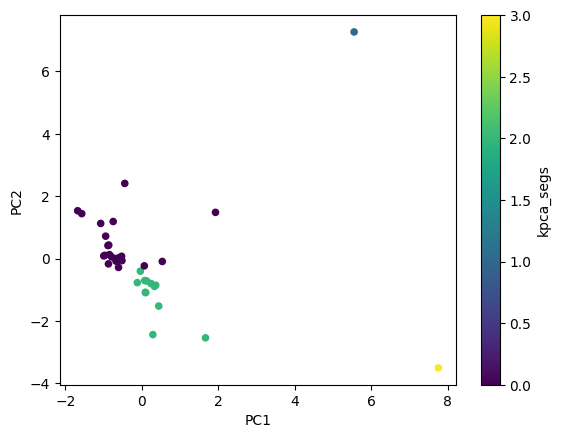

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

pca_df_market_scaled_copy.plot.scatter('PC1', 'PC2',
                                   c='kpca_segs', colormap = 'viridis')

plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

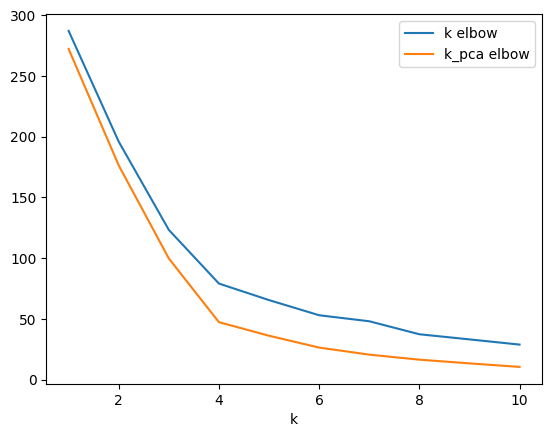

In [ ]:
# Composite plot to contrast the Elbow curves

plt.plot(k, inertia, label = 'k elbow')
plt.plot(k, inertia_pca, label = 'k_pca elbow')

plt.xlabel('k')

plt.legend()


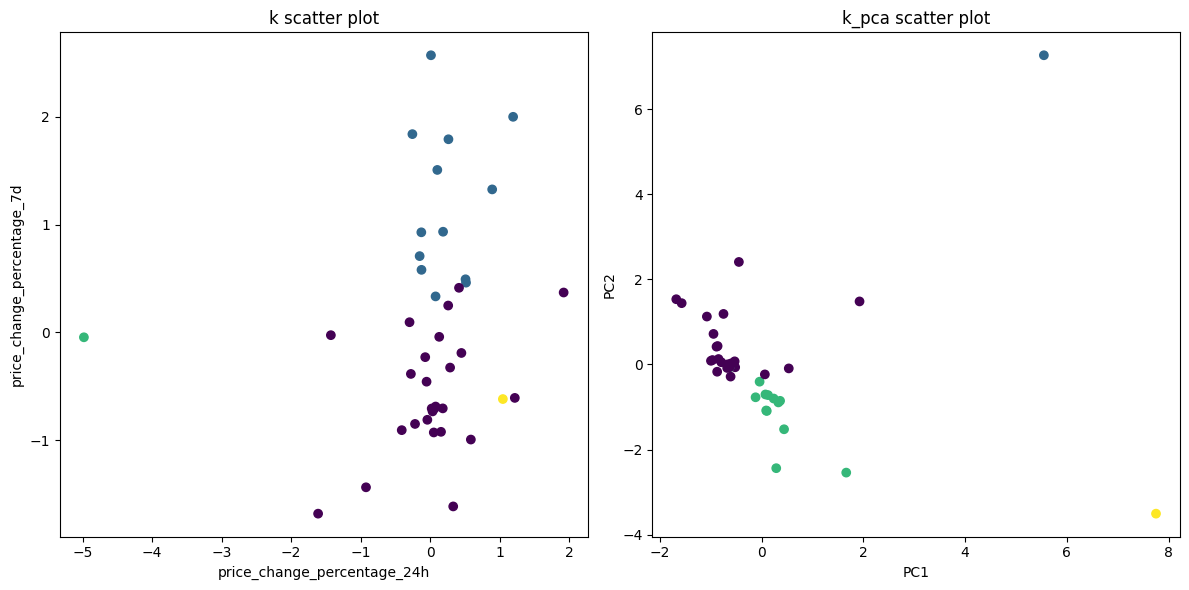

In [68]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

x1 = df_market_scaled_copy['price_change_percentage_24h']
y1 = df_market_scaled_copy['price_change_percentage_7d']
c1 = df_market_scaled_copy['k4_seg']

x2 = pca_df_market_scaled_copy['PC1']
y2 = pca_df_market_scaled_copy['PC2']
c2 = pca_df_market_scaled_copy['kpca_segs']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.scatter(x1, y1, c = c1, cmap = 'viridis')
ax2.scatter(x2, y2, c = c2, cmap = 'viridis')

ax1.set_xlabel('price_change_percentage_24h')
ax1.set_ylabel('price_change_percentage_7d')
ax1.set_title('k scatter plot')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('k_pca scatter plot')

plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Clustering the original data (df_market_data) using the Principal Component Analysis (PCA) method -- which decreases the features in a dataset -- seems to have decreased the overlap between the clusters (as shown in 'k_pca scatter plot'). Less overlap between data clusters suggests that PCA was successful in identifying unique groups within the dataset.
